# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [245]:
# Melakukan import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [246]:
# Memuat dataset dari hasil clustering
df_bank_transaction = pd.read_csv("Dataset_clustering.csv")
df_bank_transaction.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,Debit,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,Debit,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,Credit,2
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,Debit,2
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Atlanta,D000308,65.164.3.100,M091,Online,26.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,Credit,1


In [247]:
# Memerika informasi dari dataset
df_bank_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   Location                 2512 non-null   object 
 5   DeviceID                 2512 non-null   object 
 6   IP Address               2512 non-null   object 
 7   MerchantID               2512 non-null   object 
 8   Channel                  2512 non-null   object 
 9   CustomerAge              2512 non-null   float64
 10  CustomerOccupation       2512 non-null   object 
 11  TransactionDuration      2512 non-null   float64
 12  LoginAttempts            2512 non-null   float64
 13  AccountBalance           2512 non-null   float64
 14  PreviousTransactionDate 

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [248]:
# Membuat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['Location', 'CustomerOccupation', 'Channel']

# Encode kolom kategorikal
for column in categorical_columns:
    df_bank_transaction[column] = label_encoder.fit_transform(df_bank_transaction[column])

# Menampilkan dataframe untuk memastikan encoding diterapkan
df_bank_transaction.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionType,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,36,D000380,162.198.218.92,M015,0,70.0,0,81.0,1.0,5112.21,2024-11-04 08:08:08,Debit,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,15,D000051,13.149.61.4,M052,0,68.0,0,141.0,1.0,13758.91,2024-11-04 08:09:35,Debit,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,23,D000235,215.97.143.157,M009,2,19.0,3,56.0,1.0,1122.35,2024-11-04 08:07:04,Credit,2
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,33,D000187,200.13.225.150,M002,2,26.0,3,25.0,1.0,8569.06,2024-11-04 08:09:06,Debit,2
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,1,D000308,65.164.3.100,M091,2,26.0,3,198.0,1.0,7429.40,2024-11-04 08:06:39,Credit,1


In [249]:
# Melakukan one-hot-encoding pada kolom TransactionType
df_bank_transaction_encoding = pd.get_dummies(df_bank_transaction, columns=['TransactionType'])

# Menampilkan dataframe untuk memastikan encoding diterapkan
df_bank_transaction_encoding.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster,TransactionType_Credit,TransactionType_Debit
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,36,D000380,162.198.218.92,M015,0,70.0,0,81.0,1.0,5112.21,2024-11-04 08:08:08,0,False,True
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,15,D000051,13.149.61.4,M052,0,68.0,0,141.0,1.0,13758.91,2024-11-04 08:09:35,0,False,True
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,23,D000235,215.97.143.157,M009,2,19.0,3,56.0,1.0,1122.35,2024-11-04 08:07:04,2,True,False
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,33,D000187,200.13.225.150,M002,2,26.0,3,25.0,1.0,8569.06,2024-11-04 08:09:06,2,False,True
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,1,D000308,65.164.3.100,M091,2,26.0,3,198.0,1.0,7429.40,2024-11-04 08:06:39,1,True,False


In [250]:
# Membuat instance MinMaxScaller
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = df_bank_transaction_encoding.drop(columns=['Cluster']).select_dtypes(
    include=['int64', 'float64']).columns
df_bank_transaction_encoding[numeric_columns] = scaler.fit_transform(df_bank_transaction_encoding[numeric_columns])

# Menampilkan dataframe untuk memastikan normalisasi diterapkan
df_bank_transaction_encoding.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster,TransactionType_Credit,TransactionType_Debit
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,0.857143,D000380,162.198.218.92,M015,0.0,0.838710,0.0,0.244828,0.0,0.336832,2024-11-04 08:08:08,0,False,True
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,0.357143,D000051,13.149.61.4,M052,0.0,0.806452,0.0,0.451724,0.0,0.918055,2024-11-04 08:09:35,0,False,True
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,0.547619,D000235,215.97.143.157,M009,1.0,0.016129,1.0,0.158621,0.0,0.068637,2024-11-04 08:07:04,2,True,False
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,0.785714,D000187,200.13.225.150,M002,1.0,0.129032,1.0,0.051724,0.0,0.569198,2024-11-04 08:09:06,2,False,True
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,0.023810,D000308,65.164.3.100,M091,1.0,0.129032,1.0,0.648276,0.0,0.492591,2024-11-04 08:06:39,1,True,False


In [251]:
# Melakukan drop pada kolom-kolom tertentu
df_bank_transaction_drop = df_bank_transaction_encoding.drop(
    columns=['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address', 'TransactionDate',
             'PreviousTransactionDate'])

# Menampilkan dataframe setelah melakukan dropping
df_bank_transaction_drop.head()

,TransactionAmount,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Cluster,TransactionType_Credit,TransactionType_Debit
0,0.007207,0.857143,0.0,0.838710,0.0,0.244828,0.0,0.336832,0,False,True
1,0.195940,0.357143,0.0,0.806452,0.0,0.451724,0.0,0.918055,0,False,True
2,0.065680,0.547619,1.0,0.016129,1.0,0.158621,0.0,0.068637,2,True,False
3,0.096016,0.785714,1.0,0.129032,1.0,0.051724,0.0,0.569198,2,False,True
4,0.006874,0.023810,1.0,0.129032,1.0,0.648276,0.0,0.492591,1,True,False


In [252]:
# Memisahkan fitur (X) dan target (Y)
X = df_bank_transaction_drop.drop(columns=['Cluster'])
y = df_bank_transaction_drop['Cluster']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan bentuk set peltihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(2009, 10), y_train=(2009,)
Test set shape: X_test=(503, 10), y_test=(503,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [253]:
# Pelatihan Model
# Mendefinisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)

print("Training model selesai")

Training model selesai


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [259]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    evaluate_results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }

    return evaluate_results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree': evaluate_model(dt, X_test, y_test)
}

# Memuat dataframe untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Mengisi dataframe dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Mengkonversi daftar kamus menjadi dataframe
summary_df = pd.DataFrame(rows)

# Menampilkan dataframe
print(summary_df)

                       Model  Accuracy  Precision    Recall  F1-Score
0  K-Nearest Neighbors (KNN)  0.878728   0.882359  0.878728  0.879505
1              Decision Tree  0.926441   0.927039  0.926441  0.926695


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

**Hasil Confusion Matrix Algoritnma KNN**
Model K-Nearest Neighbors (KNN) menunjukan hasil evaluasi sebagai berikut. Matrix Confusion menjelaskan bahwa model berhasil mengidentifikasi

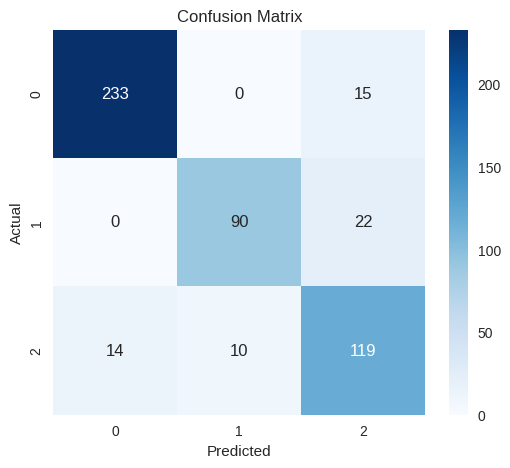

In [260]:
# Hasil Confussion Matrix Algoritma KNN
def plot_confusion_matrix(cm):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(results["K-Nearest Neighbors (KNN)"]["Confusion Matrix"])

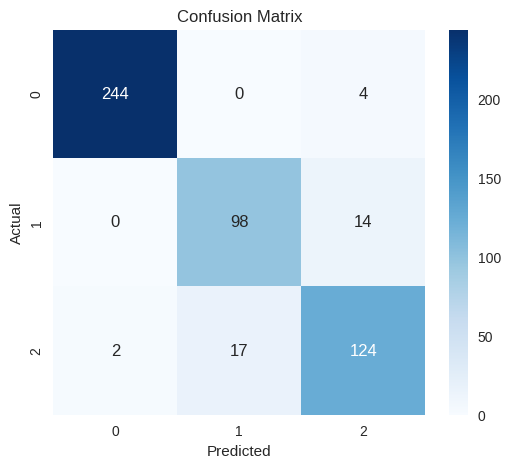

In [261]:
# Hasil Confussion Matrix Algoritma Decision Tree
plot_confusion_matrix(results["Decision Tree"]["Confusion Matrix"])

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [257]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [258]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.